In [1]:
#pip install mlxtend

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
df

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,...,0,0,0,0,0,0,0,0,0,4
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,...,0,0,0,0,0,0,0,0,0,7
59378,79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,...,0,0,0,0,0,0,0,0,0,8
59379,79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,...,1,0,0,0,0,0,0,0,0,8


In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(59381, 128)

59381 dòng, 128 cột

In [6]:
df.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [7]:
column_types = df.dtypes
for column, dtype in column_types.items():
    print(f"{column}: {dtype}")

Id: int64
Product_Info_1: int64
Product_Info_2: object
Product_Info_3: int64
Product_Info_4: float64
Product_Info_5: int64
Product_Info_6: int64
Product_Info_7: int64
Ins_Age: float64
Ht: float64
Wt: float64
BMI: float64
Employment_Info_1: float64
Employment_Info_2: int64
Employment_Info_3: int64
Employment_Info_4: float64
Employment_Info_5: int64
Employment_Info_6: float64
InsuredInfo_1: int64
InsuredInfo_2: int64
InsuredInfo_3: int64
InsuredInfo_4: int64
InsuredInfo_5: int64
InsuredInfo_6: int64
InsuredInfo_7: int64
Insurance_History_1: int64
Insurance_History_2: int64
Insurance_History_3: int64
Insurance_History_4: int64
Insurance_History_5: float64
Insurance_History_7: int64
Insurance_History_8: int64
Insurance_History_9: int64
Family_Hist_1: int64
Family_Hist_2: float64
Family_Hist_3: float64
Family_Hist_4: float64
Family_Hist_5: float64
Medical_History_1: float64
Medical_History_2: int64
Medical_History_3: int64
Medical_History_4: int64
Medical_History_5: int64
Medical_History_6:

có 1 cột (Product_Info_2) mang kiểu dữ liệu object (sẽ xem xét việc không dùng tới cột này khi xây mô hình vì sai kiểu dữ liệu)

In [8]:
null_percentages = df.isnull().sum()/len(df)
columns_with_null = null_percentages[null_percentages > 0]
columns_with_null = pd.DataFrame(columns_with_null)
columns_with_null = columns_with_null.rename(columns={0:'Null_percentages'})
columns_with_null['Column_Count'] = df.isnull().sum()
columns_with_null = columns_with_null.sort_values(by='Null_percentages', ascending=False)
columns_with_null = columns_with_null.reset_index()
columns_with_null = columns_with_null.rename(columns={'index': 'Column'})
columns_with_null

,Column,Null_percentages,Column_Count
0,Medical_History_10,0.990620,58824
1,Medical_History_32,0.981358,58274
2,Medical_History_24,0.935990,55580
3,Medical_History_15,0.751015,44596
4,Family_Hist_5,0.704114,41811
5,Family_Hist_3,0.576632,34241
6,Family_Hist_2,0.482579,28656
7,Insurance_History_5,0.427679,25396
8,Family_Hist_4,0.323066,19184
9,Employment_Info_6,0.182786,10854


<Axes: xlabel='Column_Count', ylabel='Column'>

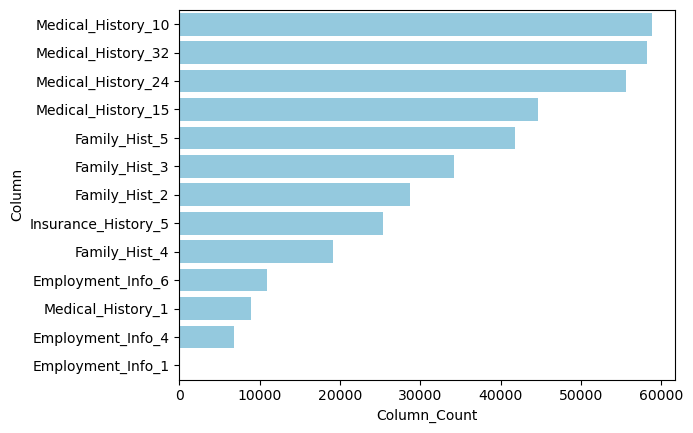

In [9]:
sns.barplot(data = columns_with_null, x = 'Column_Count', y = 'Column', color = 'skyblue')

In [10]:
df = df.drop(columns = ['Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5', 'Medical_History_10', 
             'Medical_History_15', 'Medical_History_24', 'Medical_History_32'], axis = 1)

Chọn xóa 
    -'Medical_History_10','Medical_History_15', 'Medical_History_24', 'Medical_History_32' dù nó có độ quan trọng cao nhưng tỉ lệ null quá cao > 75%.
    -'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5' có mức độ null trong khoảng 30-70% là tương đối cao và những cột này sẽ tốn rất nhiều thời gian để hoàn thành, thậm chí đôi khi không thể hoàn thành vì những lý do đặc biệt và điều này đi ngược lại mục đích của mô hình là giảm thời gian đưa ra đề xuất cho khách hàng nên sẽ xóa

In [11]:
df = df.dropna()
df = df.reset_index()
df = df.drop(columns = ['index'], axis = 1)

In [12]:
df

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
1,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
2,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
3,10,1,D2,26,0.230769,3,1,1,0.507463,0.836364,...,0,0,0,0,0,0,0,0,0,8
4,14,1,D2,26,0.076923,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35948,79136,1,D3,26,0.230769,2,3,1,0.238806,0.763636,...,0,0,0,0,0,0,0,0,0,4
35949,79138,1,D3,26,0.487179,2,3,1,0.477612,0.763636,...,0,0,1,0,0,0,0,0,1,2
35950,79140,1,D4,26,0.307692,2,3,1,0.164179,0.690909,...,0,0,0,0,0,0,0,0,0,7
35951,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,...,0,0,0,0,0,0,0,0,0,4


# Trực quan hóa cột Response

In [13]:
df['Response'].value_counts()

Response
8    11597
6     6756
7     5096
2     4240
1     3841
5     3138
4      741
3      544
Name: count, dtype: int64

<Axes: xlabel='Response', ylabel='count'>

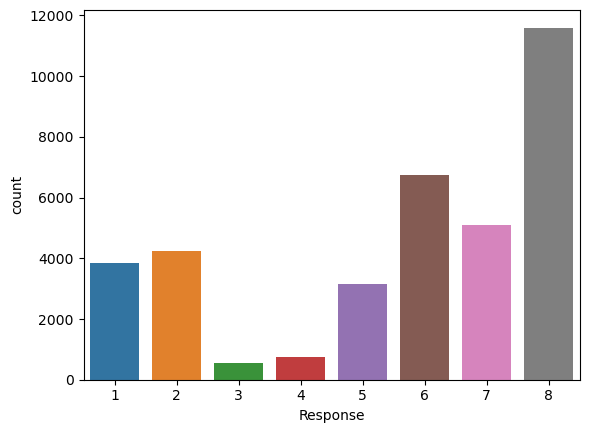

In [14]:
sns.countplot(data=df,
             x='Response')

Tỉ lệ khách hàng phân bố tương đối đồng đều ở nhóm 1,2,5,6,7,8 nhưng nhóm 3,4 lại khá ít -> Đề xuất chia lại tập dữ liệu thành 2 nhóm khách hàng tốt và không tốt để mô hình có thể phân loại tốt hơn và dữ liệu được cân bằng

# Chia lại nhóm khách hàng thành 2 loại: Khách hàng tốt (0), khách hàng không tốt (1)

In [15]:
df['Response'] = df['Response'].replace({1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1})

# Trực quan hóa Response sau khi chia lại nhóm khách hàng

In [16]:
df['Response'].value_counts()

Response
0    19260
1    16693
Name: count, dtype: int64

In [17]:
df['Response'].value_counts() / len(df)

Response
0    0.535699
1    0.464301
Name: count, dtype: float64

<Axes: xlabel='Response', ylabel='count'>

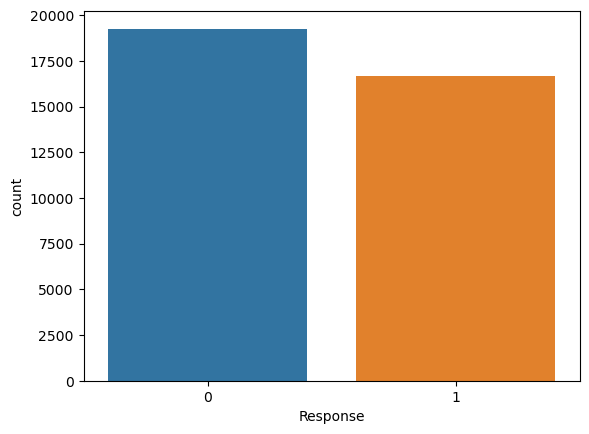

In [18]:
sns.countplot(data=df,
             x='Response')

Sau khi chia lại tỉ lệ dữ liệu đã bằng cân hơn rất nhiều: 53.6% (19260) khách hàng tốt và 46.7% (16693) khách hàng không tốt

# Sử dụng 1 mô hình black hole Random forest để lọc ra 20 biến quan trọng nhất

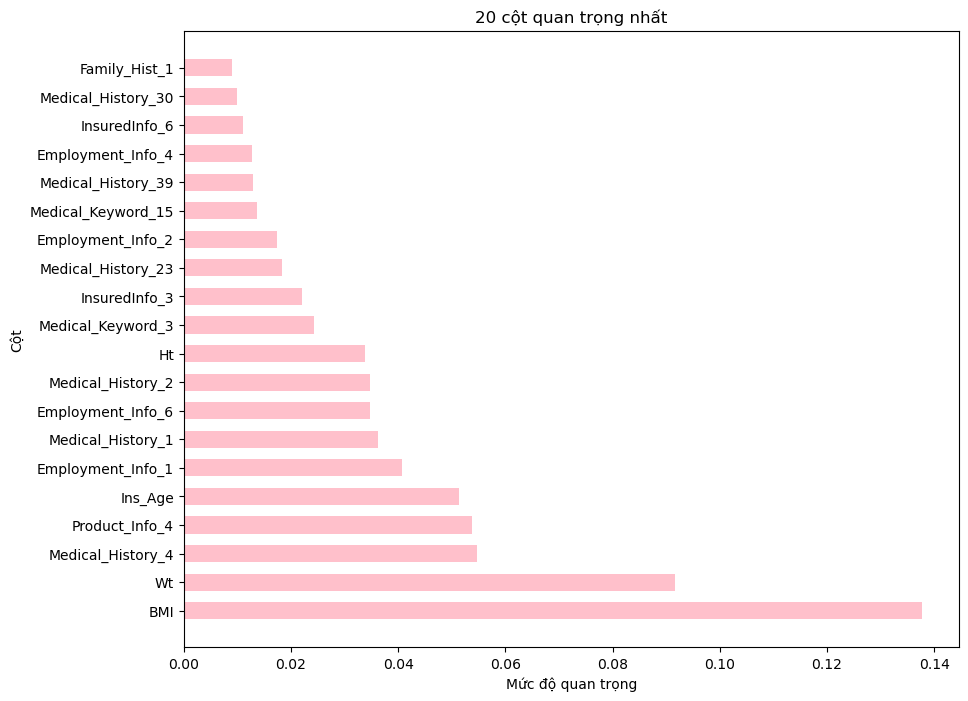

In [19]:
X = df.drop(columns=['Id', 'Response', 'Product_Info_2'])  # Đặc trưng (features)
y = df['Response']  # Nhãn (labels)
model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
feature_names = X.columns

feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

top_20_features = feature_importances_df.head(20)

plt.figure(figsize=(10, 8))
plt.title("20 cột quan trọng nhất")
plt.barh(top_20_features['Feature'], top_20_features['Importance'], height=0.6, color = 'pink')
plt.xlabel("Mức độ quan trọng")
plt.ylabel("Cột")
plt.show()

Sẽ sử dụng 7 cột có chỉ số quan trọng cao nhất đó là ['BMI', 'Wt', 'Medical_History_4', 'Product_Info_4', 'Ins_Age', 'Employment_Info_1',  'Medical_History_1']

# Xây dựng mô hình hồi quy logistic

In [20]:
from sklearn.linear_model import LogisticRegression
X = df.drop(columns=['Id', 'Response', 'Product_Info_2'])  # Đặc trưng (features)
y = df['Response']  # Nhãn (labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)
X_train = X_train[['BMI', 'Wt', 'Ins_Age', 'Employment_Info_1', 'Product_Info_4',  'Medical_History_1'
                 , 'Medical_History_4']]
X_test = X_test[['BMI', 'Wt', 'Ins_Age', 'Employment_Info_1', 'Product_Info_4',  'Medical_History_1'
                 , 'Medical_History_4']]

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7231261298845779

-> Mô hình có tỉ lệ Accuracy là 72,3%. Đã đạt được yêu cầu của nhóm

# Kiểm tra lại bằng bằng chia ra thành 5 tập dữ liệu và kiểm tra chéo

In [21]:
X = df[['BMI', 'Wt', 'Ins_Age', 'Employment_Info_1', 'Product_Info_4',  'Medical_History_1'
                 , 'Medical_History_4']]
y = df['Response']
model2 = LogisticRegression()
scores = cross_val_score(model2, X, y, cv=5) # chia làm 5 tập và thực hiện kiểm tra chéo
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.72298707 0.73216521 0.72020581 0.727121   0.72280946]
Mean accuracy: 0.7250577090935606
Standard deviation: 0.004187046331038709


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean accuracy: 72.5% và có độ lệnh chuẩn rất thấp chỉ 0.42%. Điều này thể hiện mô hình đang có khả năng Overfit rất thấp.

# Trực quan hóa Confusion matrix

Confusion Matrix:
[[2922 1016]
 [ 975 2278]]


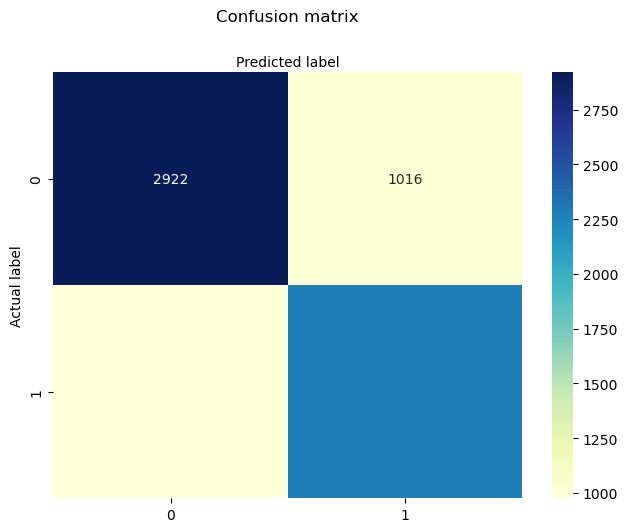

In [22]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# vẽ heatmap
predictions = model.predict(X_test)
cnf_matrix=confusion_matrix(y_test, predictions)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# AUC_ROC, Recall

In [23]:
target_names = ['Tốt', 'Không tốt']
predictions = model.predict(X_test)
cnf_matrix=confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions, target_names=target_names))
y_pred = model.predict(X_test)

print("\nDiện tích dưới đường cong ROC (AUC):", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

         Tốt       0.75      0.74      0.75      3938
   Không tốt       0.69      0.70      0.70      3253

    accuracy                           0.72      7191
   macro avg       0.72      0.72      0.72      7191
weighted avg       0.72      0.72      0.72      7191


Diện tích dưới đường cong ROC (AUC): 0.7941652327960111


# Nhận xét: 
    Tỉ lệ Recall (dương tính thật) là 74%. Đây là 1 tỉ lệ tương đối tốt vì trong thực tế với các doanh nghiệp về cho vay hay bán bảo hiểm thì việc phân loại 1 khách hàng là tốt thật rất quan trọng vì nếu cho 1 khách hàng được đánh giá là tốt nhưng thực tế khách đó lại không tốt sẽ làm doanh nghiệp tổn thất rất lớn vì đền bù hoặc mất trắng khoản cho khách hàng vay. Vậy nên thà rằng loại nhầm khách tốt còn hơn kinh doanh với khách xấu.

AUC: 0.7941652327960111


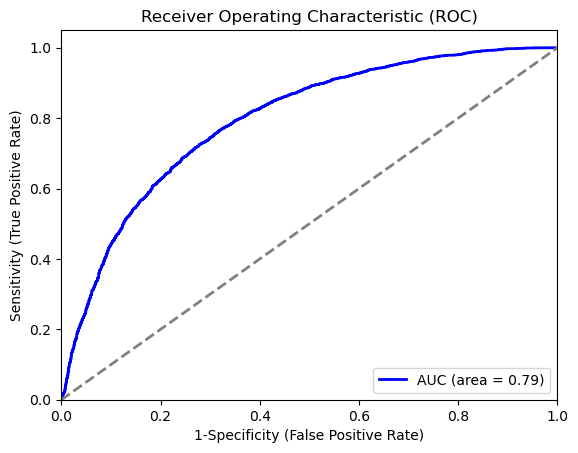

In [28]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)
# Vẽ đồ thị ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Biểu đồ có AUC: 79% -> Mô hình có khả năng phân loại tốt.

In [25]:
intercept = model.intercept_[0]
coefficients = model.coef_[0]
(intercept, coefficients)
print("Intercept (hệ số chặn):", intercept)
print("Coefficients (các hệ số):")
for col, coef in zip(X.columns, coefficients):
    print(f"  {col}: {coef}")

Intercept (hệ số chặn): 1.8683786887974154
Coefficients (các hệ số):
  BMI: -6.9305984446328175
  Wt: -2.8312603160092586
  Ins_Age: -0.8463522723949966
  Employment_Info_1: 0.5616711550737749
  Product_Info_4: 0.9146451657467597
  Medical_History_1: 0.007058975853086886
  Medical_History_4: 1.1683616067468277


In [26]:
y_test.value_counts()

Response
0    3938
1    3253
Name: count, dtype: int64